In [26]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [27]:
data_movie = pd.read_table(r'D:\school\xdf\ml-1m\movies.dat',sep="::",names=["movieID","title","genres"],engine = "python",encoding='ISO-8859-1')
data_rating = pd.read_table(r'D:\school\xdf\ml-1m\ratings.dat',sep="::",names=["userID","movieID","rating","timestep"],engine = "python",encoding='ISO-8859-1')
data_user = pd.read_table(r'D:\school\xdf\ml-1m\users.dat',sep="::",names=["userID","gender","age","occupation"],engine = "python",encoding='ISO-8859-1')

Identify all the features of each movie

In [28]:
temp = []
for val in data_movie['genres'].str.split('|'):
   temp.append(val)
#print(temp)
movie_gen = dict(zip(data_movie.movieID,temp))


In this part we create an important matrix called 'user_rating' which is 1000209*18
where 1000209 is the number of grades, 18 is the number of films' types.

Note that we view the grade from person A on film B as A grading on all types of movies that B belongs to.

we also show the std and mean of all 18 types of movies in order to find the "best genre", we will show in project that this is just a niche film that we should avoid (not consider here)

In [29]:

def  get_numof_gen(a):
    if a == "Action":
        return 0
    if a == "Adventure":
        return 1
    if a == "Animation":
        return 2
    if a == "Children's":
        return 3
    if a == "Comedy":
        return 4
    if a == "Crime":
        return 5
    if a == "Documentary":
        return 6
    if a == "Drama":
        return 7
    if a== "Fantasy":
        return 8
    if a == "Film-Noir":
        return 9
    if a == "Horror":
        return 10
    if a =="Musical":
        return 11
    if a == "Mystery":
        return 12
    if a == "Romance":
        return 13
    if a == "Sci-Fi":
        return 14
    if a == "Thriller":
        return 15
    if a == "War":
        return 16
    if a == "Western":
        return 17
    else:
        return 18
user_rating = [[0 for i in range(18)]for j in range (1000209)]
person = 1
for i in range(1000209):
    person_count = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    t=movie_gen[data_rating.movieID[i]]
    for gen in t:
        user_rating[i][get_numof_gen(gen)]=data_rating.rating[i]

new_user_rating  =  [[]for j in range (18)]
for i in range(len(user_rating)):
    for j in range(18):
        if user_rating[i][j] != 0:
            new_user_rating[j].append(user_rating[i][j])
mean_for_rating = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
std_for_rating = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(18):
    mean_for_rating[i] = np.mean(new_user_rating[i])
    std_for_rating[i] = np.std(new_user_rating[i])
print(mean_for_rating)
print(std_for_rating)

[3.4911849357368414, 3.477256948332624, 3.684868223500335, 3.422034743579087, 3.522098827752538, 3.708678543141273, 3.933122629582807, 3.766332232342065, 3.447370595851354, 4.075187558184108, 3.215013222318226, 3.6655189849035708, 3.6681019463387923, 3.607464598740535, 3.466521291339784, 3.5704660480809784, 3.893326717935996, 3.6377701493980563]
[1.1334687519898015, 1.1294593878614825, 1.0820587375786714, 1.160872834632775, 1.1207245444388074, 1.0777327551617935, 1.0330580009153818, 1.0457824202942163, 1.1331641924784517, 0.9326409540381455, 1.225522911827008, 1.1010551685761243, 1.0867258880772594, 1.0667514028608995, 1.1572355541054316, 1.1066403393066389, 1.0652821017509064, 1.0998185439573929]


Q1.1

The three charts are the results of ten experiments separately for each algorithm.

ETC occationally has a very bad result because it picks a wrong arm as the best arm, at that case the regret function will not converge.(does not show in the picture, unfortunately)

UCB and TS algorithms are more stable, but there are always some fluctuations in the regret value. UCB does not perform well since in general, it only performs well when a lot of exploration is required in the early stages.

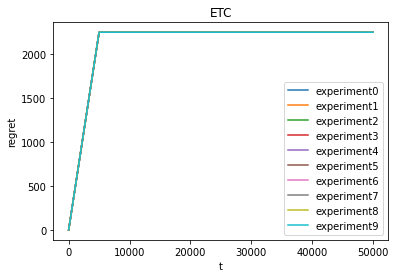

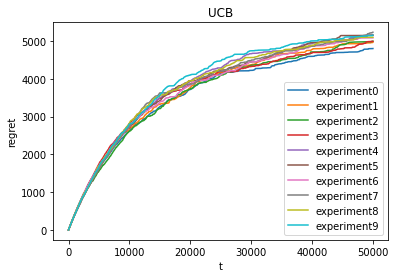

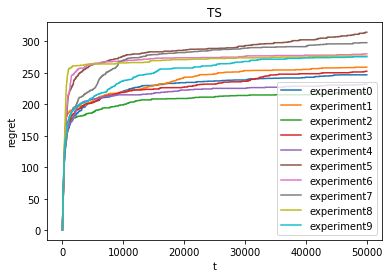

In [30]:

def get_grade(user_rating,which_arm):
    while True:
        temp = random.randint(0,1000208)
        if user_rating[temp][which_arm] != 0:
            return user_rating[temp][which_arm]
        
def ucb_reward(mean_reward, l, n ,count):
    UCB_reward = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for i in range(18):
        UCB_reward[i] = mean_reward[i] + 2*np.sqrt(l*np.log(n) / count[i])
    return UCB_reward

def ts_reward(mean_reward,count):
    grade = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for i in range(18):
        grade[i] = np.random.normal(mean_reward[i], 4/count[i])
    return grade

def ETC(user_rating, mk, n):
    total_regret = 0
    regret = []
    count = [0] * 18
    total_reward = [0] * 18
    mean_reward = [0] * 18
    for t in range(n):
        if t < mk:
            arm = t % 18
            g = get_grade(user_rating, arm)
            total_reward[arm] += g
            count[arm] += 1
            total_regret += (mean_for_rating[9] - mean_for_rating[arm])
            regret.append(total_regret)
        elif t == mk:
            for i in range(18):
                mean_reward[i] = total_reward[i] / count[i] if count[i] != 0 else 0
            best_arm = np.argmax(mean_reward)
            g = get_grade(user_rating, best_arm)
            total_regret += (mean_for_rating[9] - mean_for_rating[best_arm])
            regret.append(total_regret)
        else:
            g = get_grade(user_rating, best_arm)
            total_regret += mean_for_rating[9] - mean_for_rating[best_arm]
            regret.append(total_regret)
    return regret

def UCB(user_rating, l, n):
    total_regret = 0
    regret = []
    count = [0] * 18
    total_reward = [0] * 18
    mean_reward = [0] * 18
    UCB_reward = [0] * 18
    for t in range(n):
        if t < 18:
            arm = t % 18
            g = get_grade(user_rating, arm)
            mean_reward[arm] += g
            total_reward[arm] += g
            count[arm] += 1
            total_regret += (mean_for_rating[9] - mean_for_rating[arm])
            regret.append(total_regret)
        else:
            UCB_reward = ucb_reward(mean_reward, l, n, count)
            best_arm = np.argmax(UCB_reward)
            g = get_grade(user_rating, best_arm)
            total_regret += (mean_for_rating[9] - mean_for_rating[best_arm])
            regret.append(total_regret)
            total_reward[best_arm] += g
            count[best_arm] += 1
            mean_reward[best_arm] = total_reward[best_arm] / count[best_arm] 
    return regret


def TS (user_rating, n):
    total_regret=0
    regret = []
    count = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    total_reward = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    mean_reward = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    temp = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for t in range(n):
        if t < 18:
            arm = t%18
            g =  get_grade(user_rating,arm)
            mean_reward[arm] = mean_reward[arm] + g
            total_reward[arm] = total_reward[arm] + g
            count[arm] = count[arm] + 1
            total_regret += (mean_for_rating[9] - mean_for_rating[arm])
            regret.append(total_regret)   
        else:
            temp = ts_reward(mean_reward, count)
            best_arm = np.argmax(temp)
            g = get_grade(user_rating,best_arm)
            total_regret += (mean_for_rating[9] - mean_for_rating[best_arm])
            regret.append(total_regret)   
            total_reward[best_arm] = total_reward[best_arm] + g
            count[best_arm] =count[best_arm] + 1
            mean_reward[best_arm] = total_reward[best_arm] / count[best_arm]
    return(regret)
for i in range(10):
    x = [ii for ii in range (1,50001)]
    y = ETC(user_rating, 5000, 50000)
    plt.plot(x, y, label='experiment' + str(i))
    plt.xlabel('t') 
    plt.ylabel('regret')
    plt.title("ETC")
    plt.legend()
plt.show()

for i in range(10):
    x = [ii for ii in range (1,50001)]
    y = UCB(user_rating, 4, 50000)
    plt.plot(x, y, label='experiment' + str(i))
    plt.xlabel('t') 
    plt.ylabel('regret')
    plt.title("UCB")
    plt.legend()
plt.show()

for i in range(10):
    x = [ii for ii in range (1,50001)]
    y = TS(user_rating, 50000)
    plt.plot(x, y, label='experiment' + str(i))
    plt.xlabel('t') 
    plt.ylabel('regret')
    plt.title("TS")
    plt.legend()
plt.show()


Q1.2

Now we run 100 experiments for each algorithm and plot the average regret together with error bars indicating one standard deviation above and below the mean. The result further proves what we have concluded above.

In [31]:
repeat = 100
etc = [[]for j in range (repeat)]
ucb = [[]for j in range (repeat)]
ts = [[]for j in range (repeat)]
for i in range(repeat):
    etc[i]=(ETC(user_rating,5000,50000))
    ucb[i]=(UCB(user_rating,4,50000))
    ts[i]=(TS(user_rating,50000))




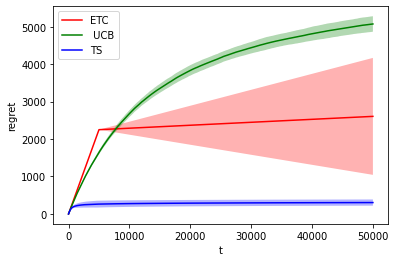

In [32]:

etc_temp = np.transpose(etc)
ucb_temp = np.transpose(ucb)
ts_temp = np.transpose(ts)

etc_mean = [j for j in range(len(etc_temp))]
ucb_mean = [j for j in range(len(etc_temp))]
ts_mean = [j for j in range(len(etc_temp))]
etc_std = [j for j in range(len(etc_temp))]
ucb_std = [j for j in range(len(etc_temp))]
ts_std = [j for j in range(len(etc_temp))]

for i in range(len(etc_temp)):
    etc_mean[i] = np.mean(etc_temp[i])
    etc_std[i] = np.std(etc_temp[i])
    ucb_mean[i] = np.mean(ucb_temp[i])
    ucb_std[i] = np.std(ucb_temp[i])
    ts_mean[i] = np.mean(ts_temp[i])
    ts_std[i] = np.std(ts_temp[i])

x = [ii for ii in range (1,50001)]
plt.plot(x, etc_mean,  label='ETC', color = 'r')
plt.plot(x, ucb_mean, label =' UCB', color = 'g')
plt.plot(x,ts_mean, label = "TS", color = 'b')
plt.fill_between(x,np.add(etc_mean, etc_std),np.subtract(etc_mean, etc_std),facecolor = 'r', alpha = 0.3)
plt.fill_between(x,np.add(ucb_mean, ucb_std),np.subtract(ucb_mean, ucb_std),facecolor = 'g', alpha = 0.3)
plt.fill_between(x,np.add(ts_mean, ts_std),np.subtract(ts_mean, ts_std),facecolor = 'b', alpha = 0.3)
plt.xlabel('t') 
plt.ylabel('regret')
plt.legend()

Q2

This question mainly about exploring how to set the value of horizon n appropriately. We consider five different values for the horizon: n = 500, n = 5, 000, n = 50, 000, n = 500, 000, and n = 5, 000, 000. the black line is just log(t)

TS shows the logarithmic regret behavior when n = 5,000

ETC shows the logarithmic regret behavior when n = 50,000 (with this chart a little bit rising is because choosing the wrong best arm in several turns, but combining with previous charts in Q1, I think it should have become logarithmic regret very soon so 500,000 is not suitable)

UCB shows the logarithmic regret behavior when n = 500,000

At first, TS is better than ETC better than UCB (this is because UCB is too cautious and hesitant)
when n is big enough(5000000) TS is better than UCB better than ETC (because ETC waste too many time in exploration)

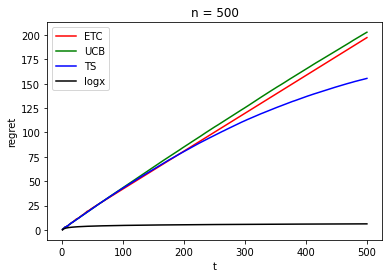

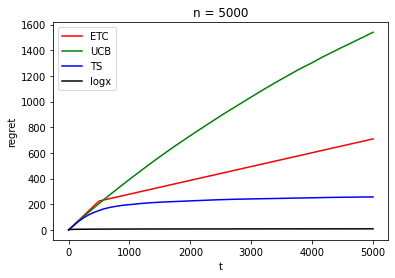

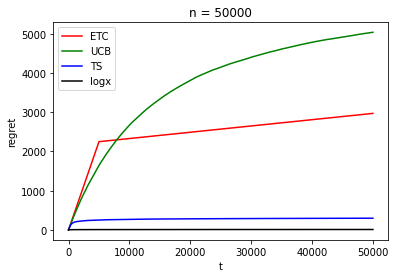

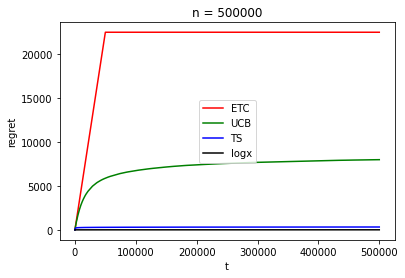

In [38]:
repeat = 100
n = [500,5000,50000,500000]
etc = [[]for j in range (repeat)]
ucb = [[]for j in range (repeat)]
ts = [[]for j in range (repeat)]
etc_mean0 = [j for j in range (n[0])]
etc_mean1 = [j for j in range (n[1])]
etc_mean2= [j for j in range (n[2])]
etc_mean3 = [j for j in range (n[3])]
ucb_mean0 = [j for j in range (n[0])]
ucb_mean1 = [j for j in range (n[1])]
ucb_mean2 = [j for j in range (n[2])]
ucb_mean3 = [j for j in range (n[3])]
ts_mean0 = [j for j in range (n[0])]
ts_mean1 = [j for j in range (n[1])]
ts_mean2 = [j for j in range (n[2])]
ts_mean3 = [j for j in range (n[3])]
for re in range(repeat):
    etc[re] = ETC(user_rating, n[0]//10, n[0])
    ucb[re] = UCB(user_rating, 4, n[0])
    ts[re] = TS(user_rating, n[0])

temp0 = np.transpose(etc)
temp1 = np.transpose(ucb)
temp2 = np.transpose(ts)
for i in range(n[0]):
    etc_mean0[i] = np.mean(temp0[i])
    ucb_mean0[i] = np.mean(temp1[i])
    ts_mean0[i] = np.mean(temp2[i])

for re in range(repeat):
    etc[re] = ETC(user_rating, n[1]//10, n[1])
    ucb[re] = UCB(user_rating, 4, n[1])
    ts[re] = TS(user_rating, n[1])
temp0 = np.transpose(etc)
temp1 = np.transpose(ucb)
temp2 = np.transpose(ts)
for i in range(n[1]):
    etc_mean1[i] = np.mean(temp0[i])
    ucb_mean1[i] = np.mean(temp1[i])
    ts_mean1[i] = np.mean(temp2[i])

for re in range(repeat):
    etc[re] = ETC(user_rating, n[2]//10, n[2])
    ucb[re] = UCB(user_rating, 4, n[2])
    ts[re] = TS(user_rating, n[2])
temp0 = np.transpose(etc)
temp1 = np.transpose(ucb)
temp2 = np.transpose(ts)
for i in range(n[2]):
    etc_mean2[i] = np.mean(temp0[i])
    ucb_mean2[i] = np.mean(temp1[i])
    ts_mean2[i] = np.mean(temp2[i])

for re in range(repeat):
    etc[re] = ETC(user_rating, n[3]//10, n[3])
    ucb[re] = UCB(user_rating, 4, n[3])
    ts[re] = TS(user_rating, n[3])
temp0 = np.transpose(etc)
temp1 = np.transpose(ucb)
temp2 = np.transpose(ts)
for i in range(n[3]):
    etc_mean3[i] = np.mean(temp0[i])
    ucb_mean3[i] = np.mean(temp1[i])
    ts_mean3[i] = np.mean(temp2[i])

for i in n:
    x = [ii for ii in range (1,i+1)]
    if i == n[0]:
        y0 = etc_mean0
        y1 = ucb_mean0
        y2 = ts_mean0
    if i == n[1]:
        y0 = etc_mean1
        y1 = ucb_mean1
        y2 = ts_mean1
    if i == n[2]:
        y0 = etc_mean2
        y1 = ucb_mean2
        y2 = ts_mean2
    if i == n[3]:
        y0 = etc_mean3
        y1 = ucb_mean3
        y2 = ts_mean3
    ttz = [ii for ii in range (1,i+1)]
    for i in range(len(ttz)):
        ttz[i] = np.log(x[i])
    plt.plot(x, y0, label='ETC', color = 'r')
    plt.plot(x, y1, label='UCB', color = 'g')
    plt.plot(x, y2, label='TS', color = 'b')
    plt.plot(x,ttz,label="logx", color = 'black')
    plt.xlabel('t') 
    plt.ylabel('regret')
    plt.title("n = "+str(i+1))
    plt.legend()
    plt.show()

Q3

This question explores how to set the parameter m for the ETC algorithm.

The performance of the ETC algorithm for five different m values: m ∗ k = 50, m ∗ k = 500, m ∗ k = 2, 000, m ∗ k = 5, 000, m ∗ k = 10, 000 are shown.

The data shows that as the exploration time becomes longer (mk increases), the differences between different experiments gradually decreases (erro bars becomes narrow) i.e. we can always find the same best arm for exploitation. The mean regret decreases at first but grows larger after that(2000) because we spend too many tries on the wrong arms.

Compared UCB and TS with ETC(m*k = 2000), we find ETC is better than UCB but worse than TS. 

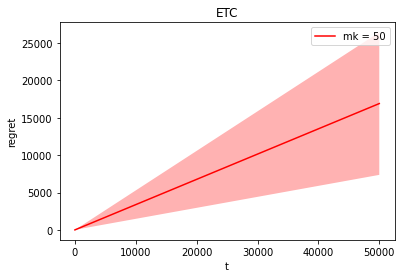

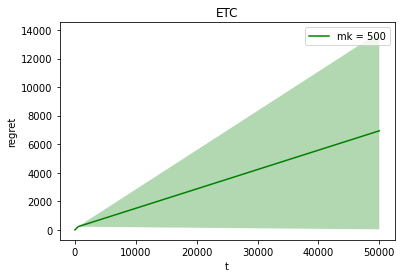

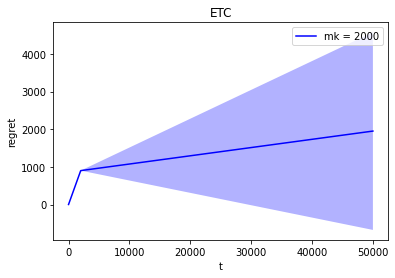

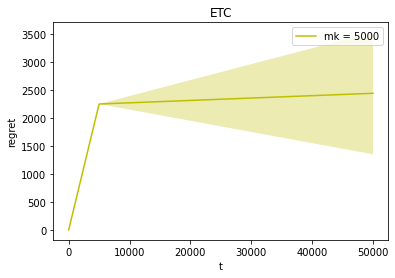

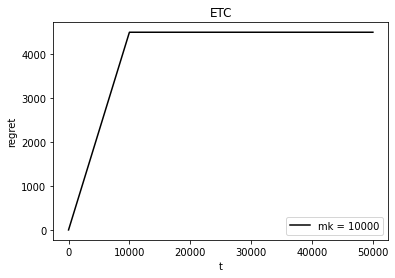

In [39]:
repeat = 100
n = 50000
mk = [50, 500, 2000, 5000, 10000]
x= [ii for ii in range (1,n+1)]
col = ['r','g','b','y','black']
etc = [[]for j in range (repeat)]
etc_mean0 = [[]for j in range (n)]
etc_std0 = [[]for j in range (n)]
for i in range(5):
    for re in range(repeat):
        etc[re] = ETC(user_rating, mk[i], n)
    temp = np.transpose(etc)
    for j in range(n):
        etc_mean0[j] = np.mean(temp[j])
        etc_std0[j] = np.std(temp[j])
    plt.plot(x, etc_mean0, label='mk = ' + str(mk[i]), color = col[i])
    plt.fill_between(x, np.add(etc_mean0,etc_std0), np.subtract(etc_mean0,etc_std0), facecolor = col[i], alpha = 0.3)
    plt.xlabel('t') 
    plt.ylabel('regret')
    plt.title("ETC")
    plt.legend()
    plt.show()
plt.show()

Q4

We compare the performance of the UCB and the asymptotically optimal UCB algorithms with l = 1,2,4

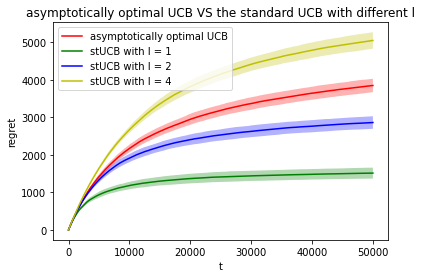

In [40]:
n = 50000
repeat = 100
col = ['r', 'g', 'b', 'y']
def new_ucb_reward(mean_reward, t ,count):
    UCB_reward = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for i in range(18):
        UCB_reward[i] = mean_reward[i] + 2*(2*np.log(1+t*(np.log(t))**2) / count[i])**0.5
    return UCB_reward
def ao_UCB (user_rating, n):
    total_regret=0
    regret = []
    count = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    total_reward = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    mean_reward = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    UCB_reward = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for t in range(n):
        if t < 18:
            arm = t%18
            g =  get_grade(user_rating,arm)
            mean_reward[arm] = mean_reward[arm] + g
            total_reward[arm] = total_reward[arm] + g
            count[arm] = count[arm] + 1
            total_regret += (mean_for_rating[9] - mean_for_rating[arm])
            regret.append(total_regret)   
        else:
            UCB_reward = new_ucb_reward(mean_reward, t, count)
            best_arm = np.argmax(UCB_reward)
            g = get_grade(user_rating, best_arm)
            total_regret += (mean_for_rating[9] - mean_for_rating[best_arm])
            regret.append(total_regret)   
            total_reward[best_arm] = total_reward[best_arm] +g
            count[best_arm] =count[best_arm] + 1
            mean_reward[best_arm] = total_reward[best_arm] / count[best_arm]
    return(regret)

aoUCB = [[]for j in range (repeat)]
UCB1 = [[]for j in range (repeat)]
UCB2 = [[]for j in range (repeat)]
UCB3 = [[]for j in range (repeat)]
aoUCB_mean = [j for j in range (n)]
UCB1_mean = [j for j in range (n)]
UCB2_mean = [j for j in range (n)]
UCB3_mean = [j for j in range (n)]
aoUCB_std = [j for j in range (n)]
UCB1_std = [j for j in range (n)]
UCB2_std = [j for j in range (n)]
UCB3_std = [j for j in range (n)]
for re in range(repeat):
    aoUCB[re] = ao_UCB(user_rating, n)
    UCB1[re] = UCB(user_rating, 1, n)
    UCB2[re] = UCB(user_rating, 2, n)
    UCB3[re] = UCB(user_rating, 4,n)
t0 = np.transpose(aoUCB)
t1 = np.transpose(UCB1)
t2 = np.transpose(UCB2)
t3 = np.transpose(UCB3)
for i in range(len(t0)):
    aoUCB_mean[i] = np.mean(t0[i])
    UCB1_mean[i] = np.mean(t1[i])
    UCB2_mean[i] = np.mean(t2[i])
    UCB3_mean[i] = np.mean(t3[i])
    aoUCB_std[i] = np.std(t0[i])
    UCB1_std[i] = np.std(t1[i])
    UCB2_std[i] = np.std(t2[i])
    UCB3_std[i] = np.std(t3[i])
plt.plot(x, aoUCB_mean, label='asymptotically optimal UCB', color = col[0])
plt.plot(x, UCB1_mean, label='stUCB with l = ' + str(1), color = col[1])
plt.plot(x, UCB2_mean, label='stUCB with l = ' + str(2), color = col[2])
plt.plot(x, UCB3_mean, label='stUCB with l = ' + str(4), color = col[3])
plt.fill_between(x, np.add(aoUCB_mean,aoUCB_std), np.subtract(aoUCB_mean,aoUCB_std), facecolor = col[0], alpha = 0.3)
plt.fill_between(x, np.add(UCB1_mean,UCB1_std), np.subtract(UCB1_mean,UCB1_std), facecolor = col[1], alpha = 0.3)
plt.fill_between(x, np.add(UCB2_mean,UCB2_std), np.subtract(UCB2_mean,UCB2_std), facecolor = col[2], alpha = 0.3)
plt.fill_between(x, np.add(UCB3_mean,UCB3_std), np.subtract(UCB3_mean,UCB3_std), facecolor = col[3], alpha = 0.3)
plt.xlabel('t') 
plt.ylabel('regret')
plt.title("asymptotically optimal UCB VS the standard UCB with different l")
plt.legend()


This is the same picture, we just change the parameter of linewith to make it more beautiful. 
As we have mentioned before we do not need so much exploration so smaller l smaller regret.

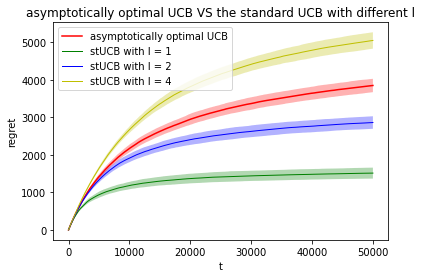

In [41]:
plt.plot(x, aoUCB_mean, label='asymptotically optimal UCB', color = col[0])
plt.plot(x, UCB1_mean, label='stUCB with l = ' + str(1), linewidth =1.0,color = col[1])
plt.plot(x, UCB2_mean, label='stUCB with l = ' + str(2), linewidth =1.0,color = col[2])
plt.plot(x, UCB3_mean, label='stUCB with l = ' + str(4), linewidth =1.0,color = col[3])
plt.fill_between(x, np.add(aoUCB_mean,aoUCB_std), np.subtract(aoUCB_mean,aoUCB_std), facecolor = col[0], alpha = 0.3)
plt.fill_between(x, np.add(UCB1_mean,UCB1_std), np.subtract(UCB1_mean,UCB1_std), facecolor = col[1], alpha = 0.3)
plt.fill_between(x, np.add(UCB2_mean,UCB2_std), np.subtract(UCB2_mean,UCB2_std), facecolor = col[2], alpha = 0.3)
plt.fill_between(x, np.add(UCB3_mean,UCB3_std), np.subtract(UCB3_mean,UCB3_std), facecolor = col[3], alpha = 0.3)
plt.xlabel('t') 
plt.ylabel('regret')
plt.title("asymptotically optimal UCB VS the standard UCB with different l")
plt.legend()

Q5

Now we compare all 4 algorithms in the same plot (n=1000000) 

NOTE: we use the parameters in Q1

NOTE: we do give the arro bars

In [ ]:
n = 1000000
repeat = 100
col = ['r', 'g', 'b', 'y']
aoUCB_fin = [[]for j in range (repeat)]
UCB_fin = [[]for j in range (repeat)]
ETC_fin = [[]for j in range (repeat)]
TS_fin = [[]for j in range (repeat)]
aoUCB_mean_fin = [j for j in range (n)]
UCB_mean_fin = [j for j in range (n)]
ETC_mean_fin = [j for j in range (n)]
TS_mean_fin = [j for j in range (n)]
aoUCB_std_fin = [j for j in range (n)]
UCB_std_fin = [j for j in range (n)]
ETC_std_fin = [j for j in range (n)]
TS_std_fin = [j for j in range (n)]
for re in range(repeat):
    aoUCB_fin[re] = ao_UCB(user_rating, n)
    UCB_fin[re] = UCB(user_rating, 4, n)
    ETC_fin[re] = ETC(user_rating, n//10, n)
    TS_fin[re] = TS(user_rating, n)
t0 = np.transpose(aoUCB_fin)
t1 = np.transpose(UCB_fin)
t2 = np.transpose(ETC_fin)
t3 = np.transpose(TS_fin)
for i in range(len(t0)):
    aoUCB_mean_fin[i] = np.mean(t0[i])
    UCB_mean_fin[i] = np.mean(t1[i])
    ETC_mean_fin[i] = np.mean(t2[i])
    TS_mean_fin[i] = np.mean(t3[i])
    aoUCB_std_fin[i] = np.std(t0[i])
    UCB_std_fin[i] = np.std(t1[i])
    ETC_std_fin[i] = np.std(t2[i])
    TS_std_fin[i] = np.std(t3[i])

prepare to print
fill


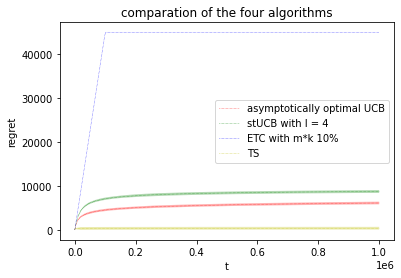

In [45]:
x = [ii for ii in range (1,1000000+1)]
print("prepare to print")
plt.plot(x, aoUCB_mean_fin, label='asymptotically optimal UCB', linewidth =0.5,color = col[0],linestyle=':')
plt.plot(x, UCB_mean_fin, label='stUCB with l = ' + str(4), linewidth =0.5,color = col[1],linestyle=':')
plt.plot(x, ETC_mean_fin, label='ETC with m*k 10%', linewidth =0.5,color = col[2],linestyle=':')
plt.plot(x, TS_mean_fin, label='TS', linewidth =0.5,color = col[3],linestyle=':')
print("fill")
plt.fill_between(x, np.add(aoUCB_mean_fin,aoUCB_std_fin), np.subtract(aoUCB_mean_fin,aoUCB_std_fin), facecolor = col[0], alpha = 0.3)
plt.fill_between(x, np.add(UCB_mean_fin,UCB_std_fin), np.subtract(UCB_mean_fin,UCB_std_fin), facecolor = col[1], alpha = 0.3)
plt.fill_between(x, np.add(ETC_mean_fin,ETC_std_fin), np.subtract(ETC_mean_fin,ETC_std_fin), facecolor = col[2], alpha = 0.3)
plt.fill_between(x, np.add(TS_mean_fin,TS_std_fin), np.subtract(TS_mean_fin,TS_std_fin), facecolor = col[3], alpha = 0.3)
plt.xlabel('t') 
plt.ylabel('regret')
plt.title("comparation of the four algorithms")
plt.legend()

Thanks for reading.

This program really took time to run, and my laptop fan turned all day and all night.But really an amazing project for me. 

This dataset itself has certain problems, such as the gender and the occupation of the scorers are uneven, and the niche movie genre with high scores in the dataset. These factors will greatly affect our actual push. We will discuss them in the final project and propose a cluster algorithm. Hope you can also enjoy it. 